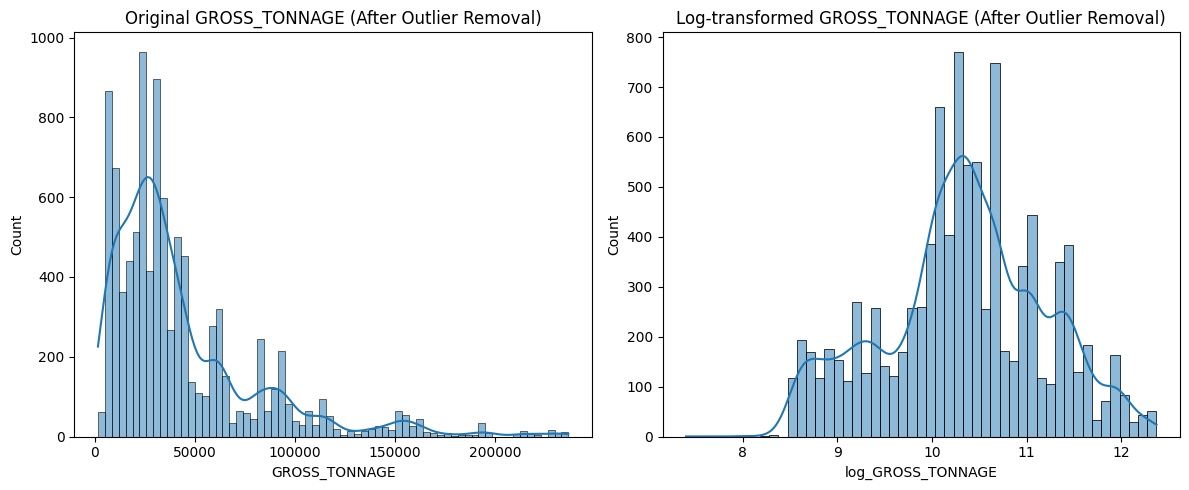

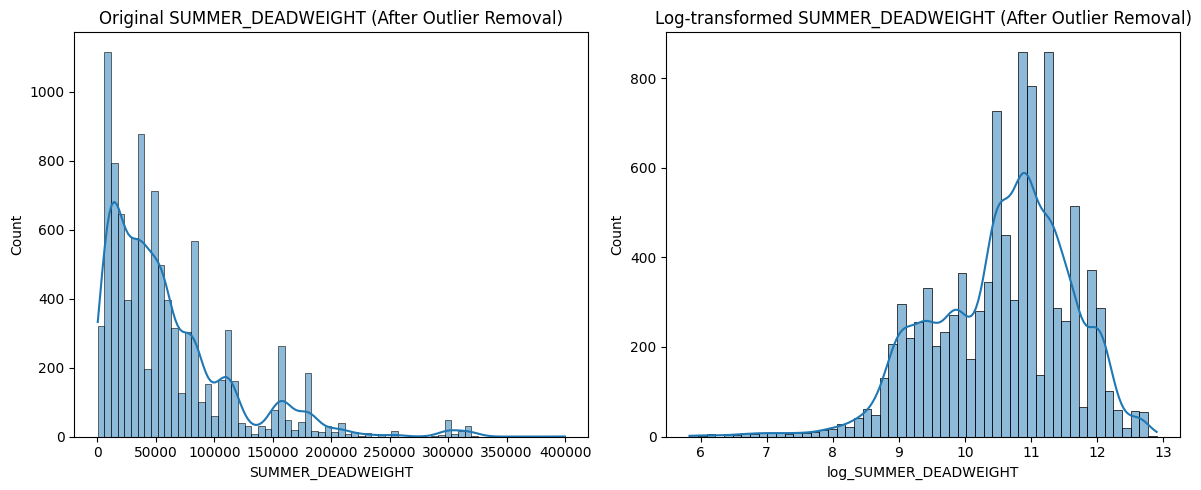

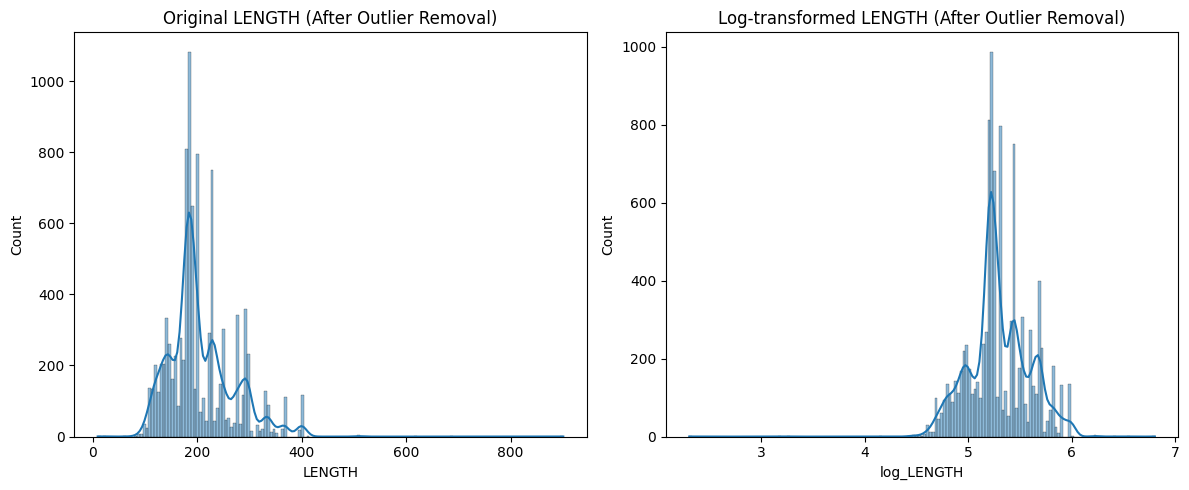

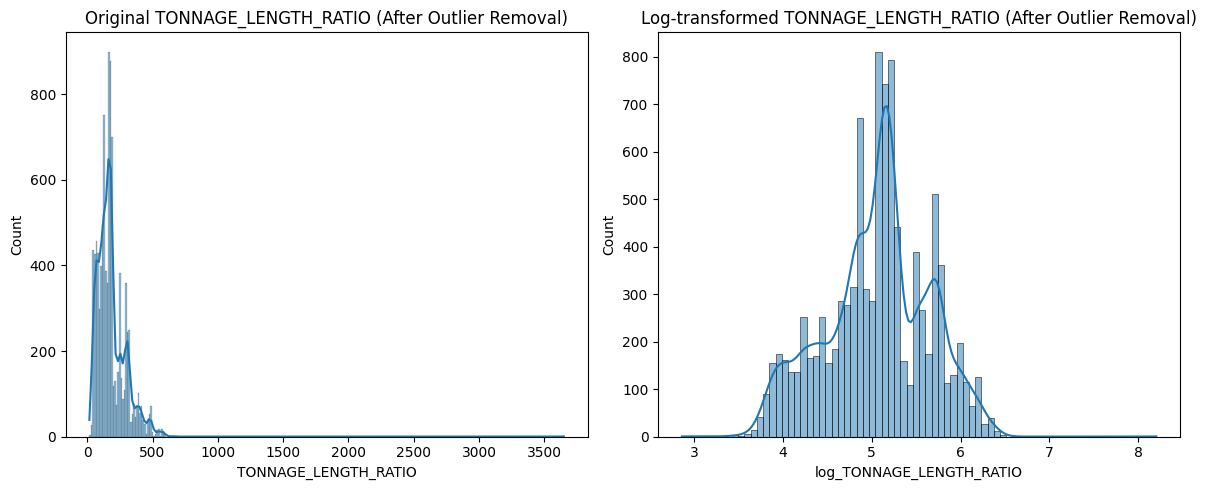

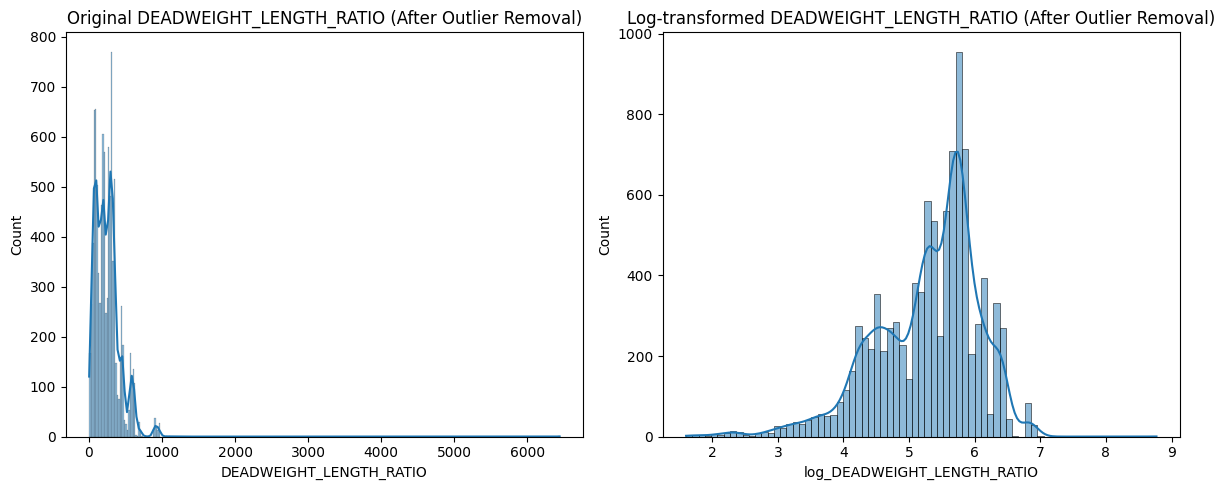

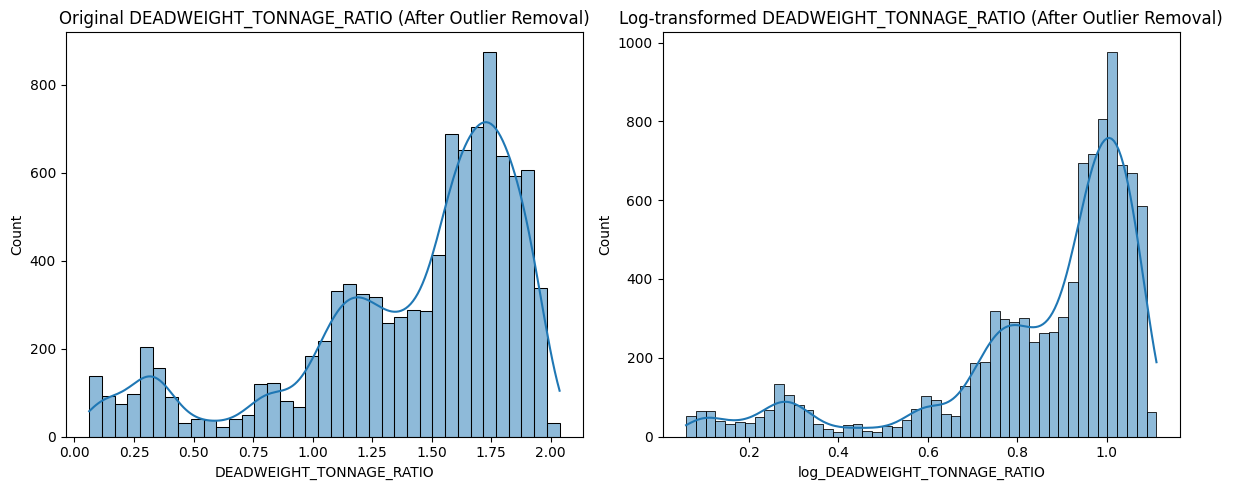

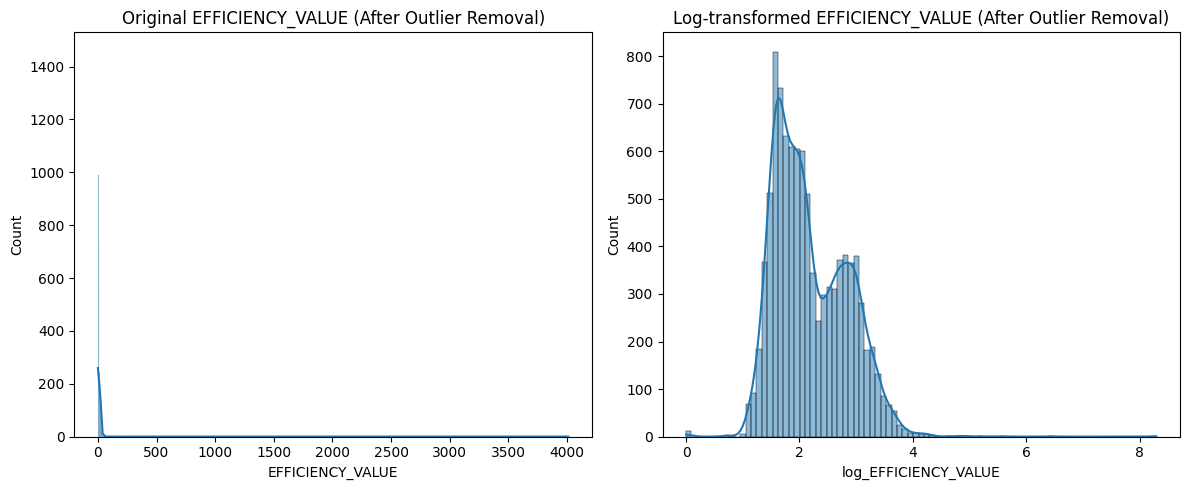

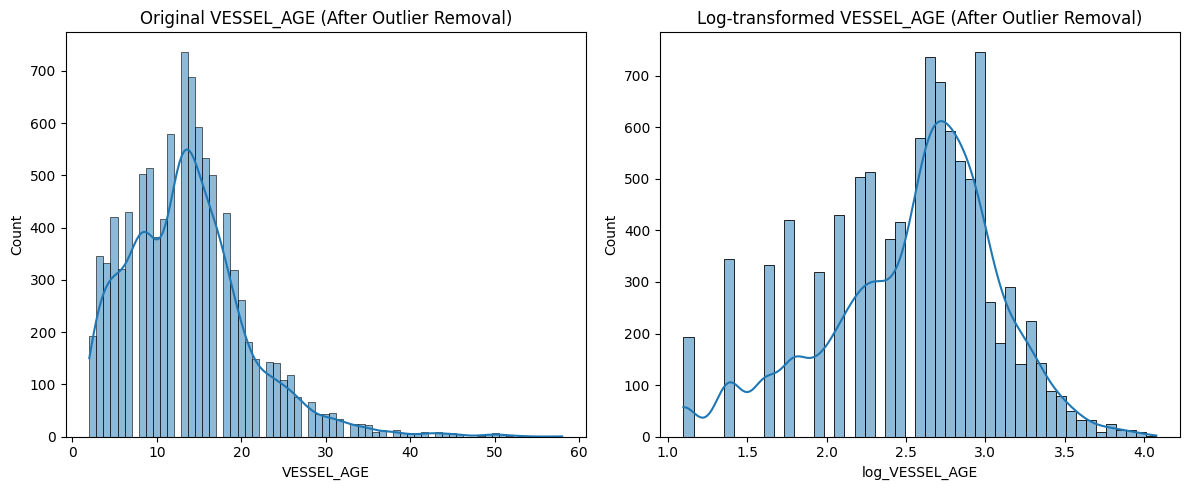

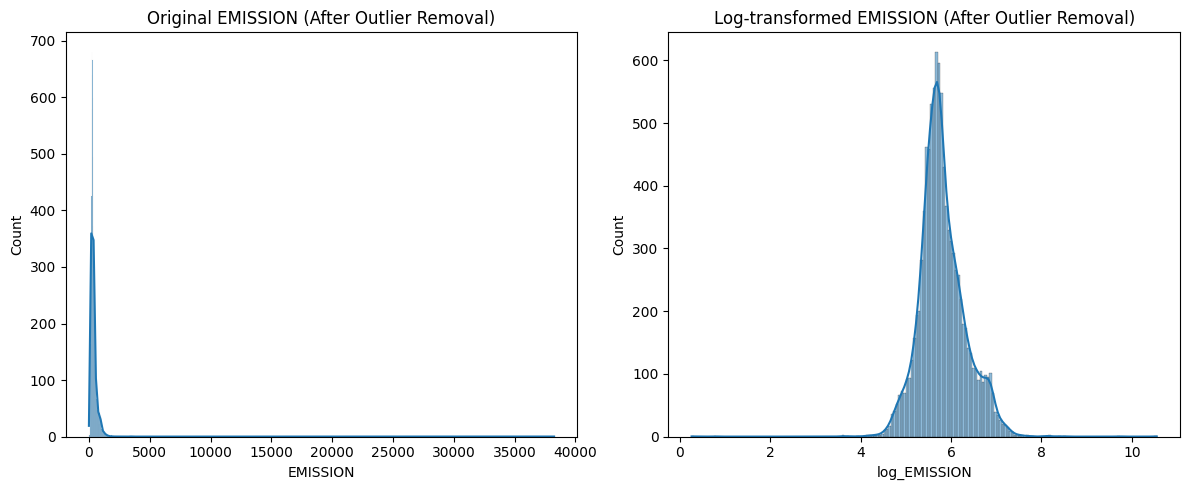

In [5]:
import config
from config import df_train, df_test, timestamp
from preprocessing import DataPreprocessor
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize preprocessor and preprocess data
preprocessor = DataPreprocessor()
df_train, df_test = preprocessor.preprocess(df_train.copy(), df_test.copy())

# List of features to check
features_to_check = ['GROSS_TONNAGE', 'SUMMER_DEADWEIGHT', 'LENGTH',
                     'TONNAGE_LENGTH_RATIO', 'DEADWEIGHT_LENGTH_RATIO', 
                     'DEADWEIGHT_TONNAGE_RATIO', 'EFFICIENCY_VALUE', 
                     'VESSEL_AGE', 'EMISSION']

# Create a copy of df_train for transformation checking
df_train_transform_checking = df_train.copy()

# Plot original and log-transformed distributions
for feature in features_to_check:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_train[feature], kde=True)
    plt.title(f'Original {feature} (After Outlier Removal)')
    
    # Apply log transformation
    df_train_transform_checking[f'log_{feature}'] = np.log1p(df_train_transform_checking[feature])
    
    # Plot log-transformed feature
    plt.subplot(1, 2, 2)
    sns.histplot(df_train_transform_checking[f'log_{feature}'], kde=True)
    plt.title(f'Log-transformed {feature} (After Outlier Removal)')
    
    plt.tight_layout()
    plt.show()
